In [3]:
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#%matplotlib inline  

In [5]:
pd.set_option('max_rows', 100) 
pd.set_option('max_columns', 50) 

In [6]:
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文,解决图中无法显示中文的问题
plt.rcParams['axes.unicode_minus']=False    #设置显示中文后,负号显示受影响。解决坐标轴上乱码问题 

# 导入数据

In [5]:
df = pd.read_csv(r"data\air_data.csv")

In [6]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,WEIGHTED_SEG_KM,LAST_FLIGHT_DATE,AVG_FLIGHT_COUNT,AVG_BP_SUM,BEGIN_TO_FIRST,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,ADD_POINTS_SUM_YR_1,ADD_POINTS_SUM_YR_2,EXCHANGE_COUNT,avg_discount,P1Y_Flight_Count,L1Y_Flight_Count,P1Y_BP_SUM,L1Y_BP_SUM,EP_SUM,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,210,505308,0,74460,239560.0,234188.0,580717,558440.14,2014/3/31,26.250,63163.500,2,1,3.483254,18,3352,36640,34,0.961639,103,107,246197,259111,74460,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,140,362480,0,41288,171483.0,167434.0,293678,367777.20,2014/3/25,17.500,45310.000,2,7,5.194245,17,0,12000,29,1.252314,68,72,177358,185122,41288,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,135,351159,0,39711,163618.0,164982.0,283712,355966.50,2014/3/21,16.875,43894.875,10,11,5.298507,18,3491,12000,20,1.254676,65,70,169072,182087,39711,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,23,337314,0,34890,116350.0,125500.0,281336,306900.88,2013/12/26,2.875,42164.250,21,97,27.863636,73,0,0,11,1.090870,13,10,186104,151210,34890,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,152,273844,0,42265,124560.0,130702.0,309928,300834.06,2014/3/27,19.000,34230.500,3,5,4.788079,47,0,22704,27,0.970658,71,81,128448,145396,42265,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [7]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'EP_SUM_YR_1', 'EP_SUM_YR_2', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'WEIGHTED_SEG_KM', 'LAST_FLIGHT_DATE',
       'AVG_FLIGHT_COUNT', 'AVG_BP_SUM', 'BEGIN_TO_FIRST', 'LAST_TO_END',
       'AVG_INTERVAL', 'MAX_INTERVAL', 'ADD_POINTS_SUM_YR_1',
       'ADD_POINTS_SUM_YR_2', 'EXCHANGE_COUNT', 'avg_discount',
       'P1Y_Flight_Count', 'L1Y_Flight_Count', 'P1Y_BP_SUM', 'L1Y_BP_SUM',
       'EP_SUM', 'ADD_Point_SUM', 'Eli_Add_Point_Sum', 'L1Y_ELi_Add_Points',
       'Points_Sum', 'L1Y_Points_Sum', 'Ration_L1Y_Flight_Count',
       'Ration_P1Y_Flight_Count', 'Ration_P1Y_BPS', 'Ration_L1Y_BPS',
       'Point_NotFlight'],
      dtype='object')

|    | 字段名            | 说明                               |
|---:|:------------------|:-----------------------------------|
|  0 | MEMBER_NO         | 会员卡号                           |
|  1 | FFP_DATE          | 入会时间                           |
|  2 | FIRST_FLIGHT_DATE | 第一次飞行日期                     |
|  3 | GENDER            | 性别                               |
|  4 | FFP_TIER          | 会员卡级别                         |
|  5 | WORK_CITY         | 工作地城市                         |
|  6 | WORK_PROVINCE     | 工作地所在省份                     |
|  7 | WORK_COUNTRY      | 工作地所在国家                     |
|  8 | AGE               | 年龄                               |
|  9 | FLIGHT_COUNT      | 观测窗口内的飞行次数               |
| 10 | LOAD_TIME         | 观测窗口的结束时间                 |
| 11 | LAST_TO_END       | 最后一次乘机时间至观测窗口结束时长 |
| 12 | AVG_DISCOUNT      | 平均折扣率                         |
| 13 | SUM_YR            | 观测窗口的票价收入                 |
| 14 | SEG_KM_SUM        | 观测窗口的总飞行公里数             |
| 15 | LAST_FLIGHT_DATE  | 末次飞行日期                       |
| 16 | AVG_INTERVAL      | 平均乘机时间间隔                   |
| 17 | MAX_INTERVAL      | 最大乘机间隔                       |
| 18 | EXCHANGE_COUNT    | 积分兑换次数                       |
| 19 | EP_SUM            | 总精英积分                         |
| 20 | PROMOPTIVE_SUM    | 促销积分                           |
| 21 | PARTNER_SUM       | 合作伙伴积分                       |
| 22 | POINTS_SUM        | 总累计积分                         |
| 23 | POINT_NOTFLIGHT   | 非乘机的积分变动次数               |
| 24 | BP_SUM            | 总基本积分                         |

## 将上诉重要字段名替换成其中文说明

In [10]:
columns = pd.read_clipboard()

In [11]:
columns

,字段名,说明
0,MEMBER_NO,会员卡号
1,FFP_DATE,入会时间
2,FIRST_FLIGHT_DATE,第一次飞行日期
3,GENDER,性别
4,FFP_TIER,会员卡级别
5,WORK_CITY,工作地城市
6,WORK_PROVINCE,工作地所在省份
7,WORK_COUNTRY,工作地所在国家
8,AGE,年龄
9,FLIGHT_COUNT,观测窗口内的飞行次数


In [12]:
dict(zip(columns.字段名, columns.说明))

{'MEMBER_NO': '会员卡号',
 'FFP_DATE': '入会时间',
 'FIRST_FLIGHT_DATE': '第一次飞行日期',
 'GENDER': '性别',
 'FFP_TIER': '会员卡级别',
 'WORK_CITY': '工作地城市',
 'WORK_PROVINCE': '工作地所在省份',
 'WORK_COUNTRY': '工作地所在国家',
 'AGE': '年龄',
 'FLIGHT_COUNT': '观测窗口内的飞行次数',
 'LOAD_TIME': '观测窗口的结束时间',
 'LAST_TO_END': '最后一次乘机时间至观测窗口结束时长',
 'AVG_DISCOUNT': '平均折扣率',
 'SUM_YR': '观测窗口的票价收入',
 'SEG_KM_SUM': '观测窗口的总飞行公里数',
 'LAST_FLIGHT_DATE': '末次飞行日期',
 'AVG_INTERVAL': '平均乘机时间间隔',
 'MAX_INTERVAL': '最大乘机间隔',
 'EXCHANGE_COUNT': '积分兑换次数',
 'EP_SUM': '总精英积分',
 'PROMOPTIVE_SUM': '促销积分',
 'PARTNER_SUM': '合作伙伴积分',
 'POINTS_SUM': '总累计积分',
 'POINT_NOTFLIGHT': '非乘机的积分变动次数',
 'BP_SUM': '总基本积分'}

In [13]:
df.rename(columns = dict(zip(columns.字段名, columns.说明)), inplace=True)

In [14]:
df.head()

,会员卡号,入会时间,第一次飞行日期,性别,会员卡级别,工作地城市,工作地所在省份,工作地所在国家,年龄,观测窗口的结束时间,观测窗口内的飞行次数,总基本积分,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,观测窗口的总飞行公里数,WEIGHTED_SEG_KM,末次飞行日期,AVG_FLIGHT_COUNT,AVG_BP_SUM,BEGIN_TO_FIRST,最后一次乘机时间至观测窗口结束时长,平均乘机时间间隔,最大乘机间隔,ADD_POINTS_SUM_YR_1,ADD_POINTS_SUM_YR_2,积分兑换次数,avg_discount,P1Y_Flight_Count,L1Y_Flight_Count,P1Y_BP_SUM,L1Y_BP_SUM,总精英积分,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,210,505308,0,74460,239560.0,234188.0,580717,558440.14,2014/3/31,26.250,63163.500,2,1,3.483254,18,3352,36640,34,0.961639,103,107,246197,259111,74460,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,140,362480,0,41288,171483.0,167434.0,293678,367777.20,2014/3/25,17.500,45310.000,2,7,5.194245,17,0,12000,29,1.252314,68,72,177358,185122,41288,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,135,351159,0,39711,163618.0,164982.0,283712,355966.50,2014/3/21,16.875,43894.875,10,11,5.298507,18,3491,12000,20,1.254676,65,70,169072,182087,39711,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,23,337314,0,34890,116350.0,125500.0,281336,306900.88,2013/12/26,2.875,42164.250,21,97,27.863636,73,0,0,11,1.090870,13,10,186104,151210,34890,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,152,273844,0,42265,124560.0,130702.0,309928,300834.06,2014/3/27,19.000,34230.500,3,5,4.788079,47,0,22704,27,0.970658,71,81,128448,145396,42265,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [15]:
df.columns

Index(['会员卡号', '入会时间', '第一次飞行日期', '性别', '会员卡级别', '工作地城市', '工作地所在省份', '工作地所在国家',
       '年龄', '观测窗口的结束时间', '观测窗口内的飞行次数', '总基本积分', 'EP_SUM_YR_1', 'EP_SUM_YR_2',
       'SUM_YR_1', 'SUM_YR_2', '观测窗口的总飞行公里数', 'WEIGHTED_SEG_KM', '末次飞行日期',
       'AVG_FLIGHT_COUNT', 'AVG_BP_SUM', 'BEGIN_TO_FIRST', '最后一次乘机时间至观测窗口结束时长',
       '平均乘机时间间隔', '最大乘机间隔', 'ADD_POINTS_SUM_YR_1', 'ADD_POINTS_SUM_YR_2',
       '积分兑换次数', 'avg_discount', 'P1Y_Flight_Count', 'L1Y_Flight_Count',
       'P1Y_BP_SUM', 'L1Y_BP_SUM', '总精英积分', 'ADD_Point_SUM',
       'Eli_Add_Point_Sum', 'L1Y_ELi_Add_Points', 'Points_Sum',
       'L1Y_Points_Sum', 'Ration_L1Y_Flight_Count', 'Ration_P1Y_Flight_Count',
       'Ration_P1Y_BPS', 'Ration_L1Y_BPS', 'Point_NotFlight'],
      dtype='object')

# 描述性统计分析

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   会员卡号                     62988 non-null  int64  
 1   入会时间                     62988 non-null  object 
 2   第一次飞行日期                  62988 non-null  object 
 3   性别                       62985 non-null  object 
 4   会员卡级别                    62988 non-null  int64  
 5   工作地城市                    60719 non-null  object 
 6   工作地所在省份                  59740 non-null  object 
 7   工作地所在国家                  62962 non-null  object 
 8   年龄                       62568 non-null  float64
 9   观测窗口的结束时间                62988 non-null  object 
 10  观测窗口内的飞行次数               62988 non-null  int64  
 11  总基本积分                    62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1              

描述性统计分析， 我们分析一下内容：  
- 1 如果是**数值型**字段， 我们分析该字段的**空值数**， **最大值**， **最小值**  
- 2 如果是**object**字段， 我们分析该字段的**空值数**， **众数**， **最大频次**

In [17]:
a = df.describe(include='all').T.loc[:, ['top', 'freq', 'min', 'max']]
a

,top,freq,min,max
会员卡号,NaN,NaN,1,62988
入会时间,2011/1/13,184,NaN,NaN
第一次飞行日期,2013/2/16,96,NaN,NaN
性别,男,48134,NaN,NaN
会员卡级别,NaN,NaN,4,6
工作地城市,广州,9385,NaN,NaN
工作地所在省份,广东,17507,NaN,NaN
工作地所在国家,CN,57748,NaN,NaN
年龄,NaN,NaN,6,110
观测窗口的结束时间,2014/3/31,62988,NaN,NaN


In [18]:
a.insert(0, '数据类型', df.apply(lambda x:str(type(x[0]))).str.replace("<class '", '').str.replace("'>", ''))

In [19]:
a

,数据类型,top,freq,min,max
会员卡号,int,NaN,NaN,1,62988
入会时间,str,2011/1/13,184,NaN,NaN
第一次飞行日期,str,2013/2/16,96,NaN,NaN
性别,str,男,48134,NaN,NaN
会员卡级别,int,NaN,NaN,4,6
工作地城市,str,广州,9385,NaN,NaN
工作地所在省份,str,广东,17507,NaN,NaN
工作地所在国家,str,CN,57748,NaN,NaN
年龄,float,NaN,NaN,6,110
观测窗口的结束时间,str,2014/3/31,62988,NaN,NaN


In [20]:
# 每一列的缺失值
a['缺失值数目'] = df.apply(lambda x:x.isna().sum())

In [21]:
a.columns = ['数据类型', '众数', '众数频次', '最小值', '最大值', '缺失值数目']

In [22]:
a

,数据类型,众数,众数频次,最小值,最大值,缺失值数目
会员卡号,int,NaN,NaN,1,62988,0
入会时间,str,2011/1/13,184,NaN,NaN,0
第一次飞行日期,str,2013/2/16,96,NaN,NaN,0
性别,str,男,48134,NaN,NaN,3
会员卡级别,int,NaN,NaN,4,6,0
工作地城市,str,广州,9385,NaN,NaN,2269
工作地所在省份,str,广东,17507,NaN,NaN,3248
工作地所在国家,str,CN,57748,NaN,NaN,26
年龄,float,NaN,NaN,6,110,420
观测窗口的结束时间,str,2014/3/31,62988,NaN,NaN,0


# 分布分析  
从**客户基本信息**   **乘机信息**   **积分信息** 3个角度探索数据， 寻找**客户信息的分布规律**

## 客户基本信息的分布分析  
选取客户信息的**入会时间**  **性别**  **会员卡等级**   **年龄**等字段进行探索分析， 探索客户的基本分布信息

### 绘制各年份会员入会柱状图

In [23]:
a = df.入会时间.apply(lambda x:x.split('/')[0]).value_counts().sort_index()
a

2004      335
2005     3078
2006     4555
2007     5865
2008     6556
2009     5653
2010     7648
2011    10708
2012    14598
2013     3992
Name: 入会时间, dtype: int64

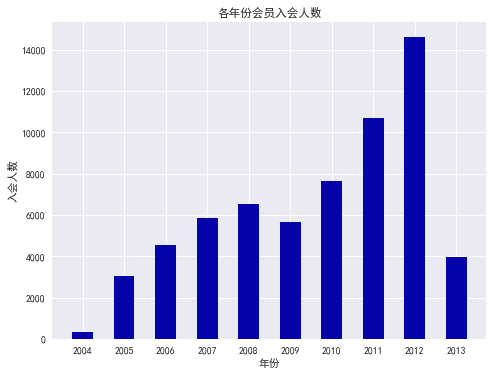

In [24]:
plt.figure(figsize=(8, 6), dpi=70)
plt.bar(a.index, a, width=0.5, color='#0504aa')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数');

大体上看上去， 入会人数也是逐年增加， 2020年达到顶峰

### 查看不同的性别的会员人数饼图

In [25]:
df.性别.isna().sum()  # 性这一列是有三个缺失值的

3

In [26]:
a = df.性别.value_counts()
a

男    48134
女    14851
Name: 性别, dtype: int64

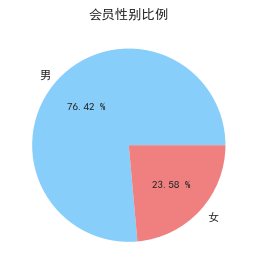

In [27]:
plt.figure(figsize=(7, 4), dpi=80)
plt.pie(a, labels=a.index, autopct='%.2f %%', colors=['lightskyblue', 'lightcoral'])
plt.title('会员性别比例');


可以看出**男会员**明显多于**女会员**

### 绘制不同会员卡等级的人数柱状图

In [28]:
a = df.会员卡级别.value_counts().sort_index()
a

4    58066
5     3409
6     1513
Name: 会员卡级别, dtype: int64

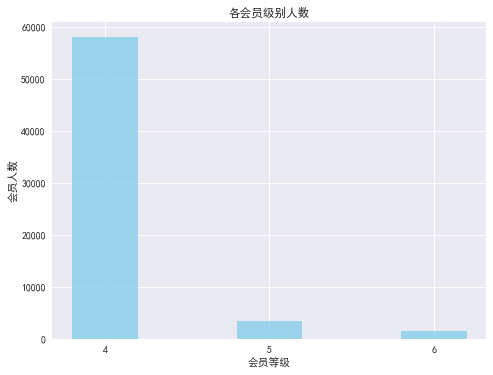

In [29]:
plt.figure(figsize=(8, 6), dpi=70)
plt.bar(a.index, a, width=0.4, alpha=0.8, color='skyblue')
plt.xlabel('会员等级')
plt.xticks(a.index)
plt.ylabel('会员人数')
plt.title('各会员级别人数');

从上图可以看出绝大部分是等级4， 只有极少部分是5， 6

### 绘制年龄分布图和年龄柱状图

In [30]:
df.年龄.isna().sum()   # 年龄这列有420个缺失值

420

In [31]:
# 删除缺失值
df.年龄.dropna()

0        31.0
1        42.0
2        40.0
3        64.0
4        48.0
         ... 
62983    25.0
62984    38.0
62985    43.0
62986    36.0
62987    29.0
Name: 年龄, Length: 62568, dtype: float64

In [32]:
import seaborn as sns

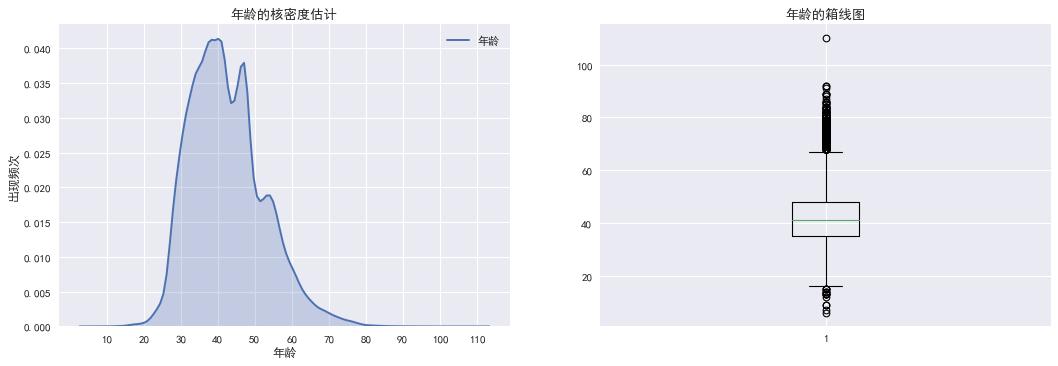

In [33]:
fp = plt.figure(figsize=(16, 5), dpi=80)
fp.add_subplot(1, 2, 1)
sns.kdeplot(df.年龄.dropna(), shade=True)
plt.xticks(list(range(10, 120, 10)))
plt.xlabel('年龄')
plt.ylabel('出现频次')
plt.title('年龄的核密度估计')

fp.add_subplot(1, 2, 2)
plt.boxplot(df.年龄.dropna())
plt.title('年龄的箱线图');

从上面可以看出， 年龄大部分集中在30-50之间， 极少数小于20岁和大于80岁， 甚至有一个大于100的可能异常值

## 客户乘机信息分布信息

### 最后一次乘机时间至观测窗口结束时长

In [34]:
df.最后一次乘机时间至观测窗口结束时长.isna().sum()  # 无缺失值

0

In [35]:
df.最后一次乘机时间至观测窗口结束时长.min()
df.最后一次乘机时间至观测窗口结束时长.max()

1

731

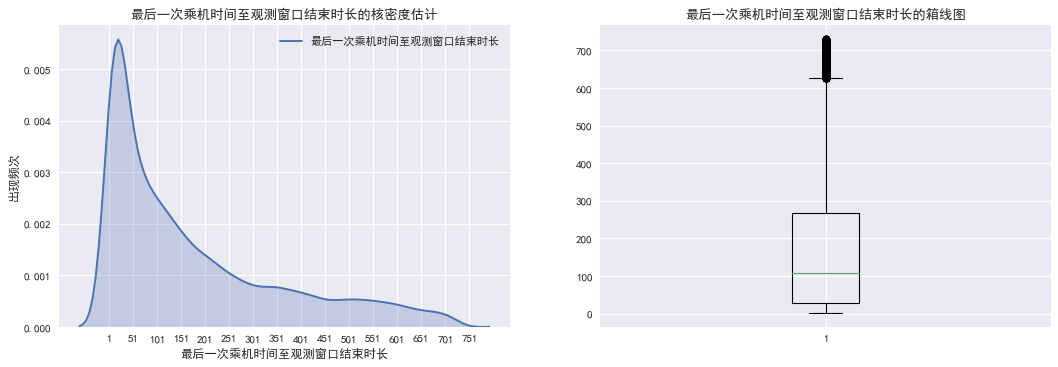

In [36]:
fp = plt.figure(figsize=(16, 5), dpi=80)
fp.add_subplot(1, 2, 1)
sns.kdeplot(df.最后一次乘机时间至观测窗口结束时长, shade=True)
plt.xlabel('最后一次乘机时间至观测窗口结束时长')
plt.xticks(range(1, 800, 50))
plt.ylabel('出现频次')
plt.title('最后一次乘机时间至观测窗口结束时长的核密度估计')

fp.add_subplot(1, 2, 2)
plt.boxplot(df.最后一次乘机时间至观测窗口结束时长)
plt.title('最后一次乘机时间至观测窗口结束时长的箱线图');

客户的主要时长分布在50-300之间， 另外也会有一部分群体在600以上， 可分为两个群体

### 观测窗口内的飞行次数

In [37]:
df.观测窗口内的飞行次数.isna().sum()

0

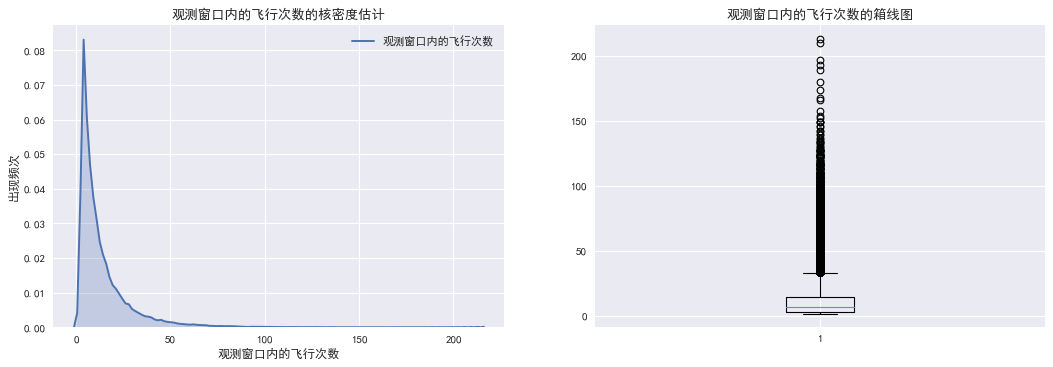

In [38]:
fp = plt.figure(figsize=(16, 5), dpi=80)
fp.add_subplot(1, 2, 1)
sns.kdeplot(df.观测窗口内的飞行次数, shade=True)
plt.xlabel('观测窗口内的飞行次数')
plt.ylabel('出现频次')
plt.title('观测窗口内的飞行次数的核密度估计')

fp.add_subplot(1, 2, 2)
plt.boxplot(df.观测窗口内的飞行次数)
plt.title('观测窗口内的飞行次数的箱线图');

可以看出， 大部分群体的飞行次数在50次以下， 50次以上的可能是高价值用户

### 观测窗口的总飞行公里数

In [39]:
df.观测窗口的总飞行公里数.isna().sum()

0

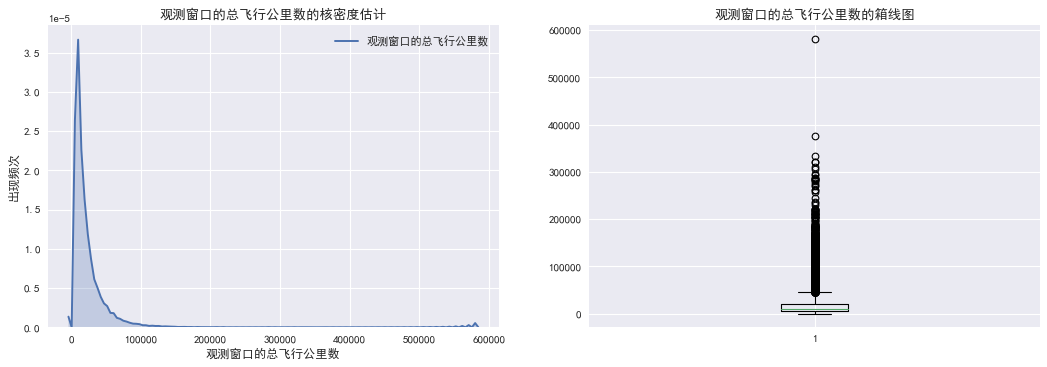

In [40]:
fp = plt.figure(figsize=(16, 5), dpi=80)
fp.add_subplot(1, 2, 1)
sns.kdeplot(df.观测窗口的总飞行公里数, shade=True)
plt.xlabel('观测窗口的总飞行公里数')
#plt.xticks(range(1, 800, 50))
plt.ylabel('出现频次')
plt.title('观测窗口的总飞行公里数的核密度估计')

fp.add_subplot(1, 2, 2)
plt.boxplot(df.观测窗口的总飞行公里数)
plt.title('观测窗口的总飞行公里数的箱线图');

同上， 飞行公里数大于100000的的反而可能是高价值客户

## 客户积分信息分布分析  
选取积分兑换次数， 总累计积分分析， 探索客户的积分信息分布情况

### 积分兑换次数和总累计积分

In [41]:
df.积分兑换次数.isna().sum()

0

In [42]:
df.积分兑换次数.value_counts()

0     54254
1      3969
2      2272
3      1066
4       591
5       309
6       186
7       106
8        71
9        38
10       36
11       18
12       14
13       11
14       11
15        9
17        5
18        4
20        4
27        3
16        3
22        2
46        1
37        1
19        1
34        1
21        1
29        1
Name: 积分兑换次数, dtype: int64

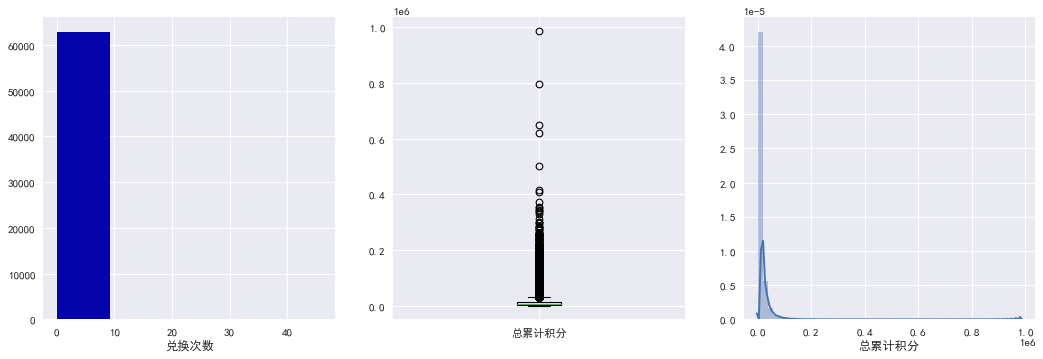

In [43]:
fp = plt.figure(figsize=(16, 5), dpi=80)
fp.add_subplot(1, 3, 1)
plt.hist(df.积分兑换次数, bins=5, color='#0504aa');
plt.xlabel('兑换次数');
fp.add_subplot(1, 3, 2)
plt.boxplot(df.Points_Sum, labels=['总累计积分']);
fp.add_subplot(1, 3, 3)
sns.distplot(df.Points_Sum)
plt.xlabel('总累计积分');

箱外的数据的累计积分远大于箱内数据的累计积分

# 相关性分析  
客户的属性之间存在相关性，选取：
- 入会时间
- 会员卡等级 
- 年龄
- 飞行次数
- 总飞行公里数
- 最近一次乘机至结束时长
- 积分兑换次数
- 总累计积分  
通过相关系数矩阵和热力图， 分析相关性

In [44]:
df.columns

Index(['会员卡号', '入会时间', '第一次飞行日期', '性别', '会员卡级别', '工作地城市', '工作地所在省份', '工作地所在国家',
       '年龄', '观测窗口的结束时间', '观测窗口内的飞行次数', '总基本积分', 'EP_SUM_YR_1', 'EP_SUM_YR_2',
       'SUM_YR_1', 'SUM_YR_2', '观测窗口的总飞行公里数', 'WEIGHTED_SEG_KM', '末次飞行日期',
       'AVG_FLIGHT_COUNT', 'AVG_BP_SUM', 'BEGIN_TO_FIRST', '最后一次乘机时间至观测窗口结束时长',
       '平均乘机时间间隔', '最大乘机间隔', 'ADD_POINTS_SUM_YR_1', 'ADD_POINTS_SUM_YR_2',
       '积分兑换次数', 'avg_discount', 'P1Y_Flight_Count', 'L1Y_Flight_Count',
       'P1Y_BP_SUM', 'L1Y_BP_SUM', '总精英积分', 'ADD_Point_SUM',
       'Eli_Add_Point_Sum', 'L1Y_ELi_Add_Points', 'Points_Sum',
       'L1Y_Points_Sum', 'Ration_L1Y_Flight_Count', 'Ration_P1Y_Flight_Count',
       'Ration_P1Y_BPS', 'Ration_L1Y_BPS', 'Point_NotFlight'],
      dtype='object')

In [45]:
data_corr = df.loc[:,['入会时间', '会员卡级别', '年龄', '观测窗口内的飞行次数', 
          '观测窗口的总飞行公里数', '最后一次乘机时间至观测窗口结束时长', 
          '积分兑换次数', 'Points_Sum'
         ] ]

In [46]:
data_corr.info()  # 年龄这一列有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   入会时间               62988 non-null  object 
 1   会员卡级别              62988 non-null  int64  
 2   年龄                 62568 non-null  float64
 3   观测窗口内的飞行次数         62988 non-null  int64  
 4   观测窗口的总飞行公里数        62988 non-null  int64  
 5   最后一次乘机时间至观测窗口结束时长  62988 non-null  int64  
 6   积分兑换次数             62988 non-null  int64  
 7   Points_Sum         62988 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 3.8+ MB


In [47]:
data_corr.年龄.isna().sum()

420

In [48]:
# 填充缺失值
data_corr.年龄.fillna(0)

0        31.0
1        42.0
2        40.0
3        64.0
4        48.0
         ... 
62983    25.0
62984    38.0
62985    43.0
62986    36.0
62987    29.0
Name: 年龄, Length: 62988, dtype: float64

In [49]:
data_corr['年龄'] = data_corr.年龄.fillna(0)

In [50]:
data_corr.apply(lambda x:x.isna().sum()) # 都不在有缺失值

入会时间                 0
会员卡级别                0
年龄                   0
观测窗口内的飞行次数           0
观测窗口的总飞行公里数          0
最后一次乘机时间至观测窗口结束时长    0
积分兑换次数               0
Points_Sum           0
dtype: int64

In [51]:
data_corr.corr(method='pearson')  # 使用皮尔逊相关系数

,会员卡级别,年龄,观测窗口内的飞行次数,观测窗口的总飞行公里数,最后一次乘机时间至观测窗口结束时长,积分兑换次数,Points_Sum
会员卡级别,1.000000,0.076245,0.582447,0.522350,-0.206313,0.342355,0.559249
年龄,0.076245,1.000000,0.075309,0.087285,-0.027654,0.032760,0.074887
观测窗口内的飞行次数,0.582447,0.075309,1.000000,0.850411,-0.404999,0.502501,0.747092
观测窗口的总飞行公里数,0.522350,0.087285,0.850411,1.000000,-0.369509,0.507819,0.853014
最后一次乘机时间至观测窗口结束时长,-0.206313,-0.027654,-0.404999,-0.369509,1.000000,-0.169717,-0.292027
积分兑换次数,0.342355,0.032760,0.502501,0.507819,-0.169717,1.000000,0.578581
Points_Sum,0.559249,0.074887,0.747092,0.853014,-0.292027,0.578581,1.000000


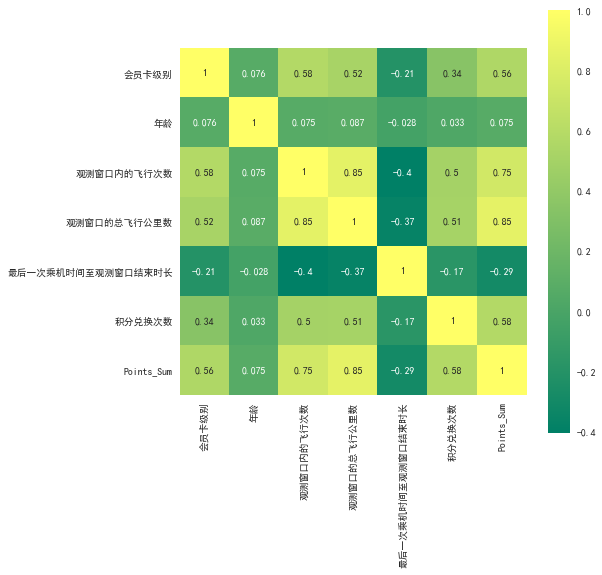

In [52]:
# 绘制热力图
import seaborn as sns
plt.figure(figsize=(8, 8), dpi=70)
sns.heatmap(data_corr.corr(), 
            annot = True,      # 显示数值
            vmax = 1, 
            square=True,   # 让个小单元格正方
            cmap = plt.cm.summer   # 颜色， 蓝色'Blues'
        
           );

这里可以看出**某些属性之间相关性较高**， 比如**兑换次数**和**飞行公里数**  
这里可以看出**某些属性之间相关性较低**， 比如**兑换次数**和**年龄**  


# 数据预处理

## 数据清洗

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   会员卡号                     62988 non-null  int64  
 1   入会时间                     62988 non-null  object 
 2   第一次飞行日期                  62988 non-null  object 
 3   性别                       62985 non-null  object 
 4   会员卡级别                    62988 non-null  int64  
 5   工作地城市                    60719 non-null  object 
 6   工作地所在省份                  59740 non-null  object 
 7   工作地所在国家                  62962 non-null  object 
 8   年龄                       62568 non-null  float64
 9   观测窗口的结束时间                62988 non-null  object 
 10  观测窗口内的飞行次数               62988 non-null  int64  
 11  总基本积分                    62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1              

###  缺失值处理

In [54]:
# 统计每一列的缺失值个数和占比
a = df.apply(lambda x:str(x.isna().sum())+'+'+str(round(x.isna().sum()/len(x), 2)))
a = a.str.split('+', expand=True)
a.columns = ['个数', '占比']
a   # 缺失里面并没有缺失占比很多的

,个数,占比
会员卡号,0,0.0
入会时间,0,0.0
第一次飞行日期,0,0.0
性别,3,0.0
会员卡级别,0,0.0
工作地城市,2269,0.04
工作地所在省份,3248,0.05
工作地所在国家,26,0.0
年龄,420,0.01
观测窗口的结束时间,0,0.0


In [55]:
a[a.个数.astype('int')>0]  # 所有存在缺失的字段 

,个数,占比
性别,3,0.0
工作地城市,2269,0.04
工作地所在省份,3248,0.05
工作地所在国家,26,0.0
年龄,420,0.01
SUM_YR_1,551,0.01
SUM_YR_2,138,0.0


#### 处理方案  
- 去除票价(SUM_YR_1和SUM_YR_2)同时为空的行， 这些占比很小， 故直接删除既可

In [56]:
data_clean = df[(~df.SUM_YR_1.isna())&(~df.SUM_YR_2.isna())]

In [57]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62299 entries, 0 to 62986
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   会员卡号                     62299 non-null  int64  
 1   入会时间                     62299 non-null  object 
 2   第一次飞行日期                  62299 non-null  object 
 3   性别                       62296 non-null  object 
 4   会员卡级别                    62299 non-null  int64  
 5   工作地城市                    60043 non-null  object 
 6   工作地所在省份                  59075 non-null  object 
 7   工作地所在国家                  62273 non-null  object 
 8   年龄                       61884 non-null  float64
 9   观测窗口的结束时间                62299 non-null  object 
 10  观测窗口内的飞行次数               62299 non-null  int64  
 11  总基本积分                    62299 non-null  int64  
 12  EP_SUM_YR_1              62299 non-null  int64  
 13  EP_SUM_YR_2              62299 non-null  int64  
 14  SUM_YR_1              

- 去除票价(SUM_YR_1和SUM_YR_2)同时为0的记录

In [58]:
data_clean = data_clean[(data_clean.SUM_YR_1!=0) | (data_clean.SUM_YR_2!=0)]  # 总之要保证有票价

In [59]:
data_clean

,会员卡号,入会时间,第一次飞行日期,性别,会员卡级别,工作地城市,工作地所在省份,工作地所在国家,年龄,观测窗口的结束时间,观测窗口内的飞行次数,总基本积分,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,观测窗口的总飞行公里数,WEIGHTED_SEG_KM,末次飞行日期,AVG_FLIGHT_COUNT,AVG_BP_SUM,BEGIN_TO_FIRST,最后一次乘机时间至观测窗口结束时长,平均乘机时间间隔,最大乘机间隔,ADD_POINTS_SUM_YR_1,ADD_POINTS_SUM_YR_2,积分兑换次数,avg_discount,P1Y_Flight_Count,L1Y_Flight_Count,P1Y_BP_SUM,L1Y_BP_SUM,总精英积分,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,210,505308,0,74460,239560.0,234188.0,580717,558440.14,2014/3/31,26.250000,63163.500,2,1,3.483254,18,3352,36640,34,0.961639,103,107,246197,259111,74460,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,140,362480,0,41288,171483.0,167434.0,293678,367777.20,2014/3/25,17.500000,45310.000,2,7,5.194245,17,0,12000,29,1.252314,68,72,177358,185122,41288,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,135,351159,0,39711,163618.0,164982.0,283712,355966.50,2014/3/21,16.875000,43894.875,10,11,5.298507,18,3491,12000,20,1.254676,65,70,169072,182087,39711,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,23,337314,0,34890,116350.0,125500.0,281336,306900.88,2013/12/26,2.875000,42164.250,21,97,27.863636,73,0,0,11,1.090870,13,10,186104,151210,34890,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,152,273844,0,42265,124560.0,130702.0,309928,300834.06,2014/3/27,19.000000,34230.500,3,5,4.788079,47,0,22704,27,0.970658,71,81,128448,145396,42265,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005/5/8,2005/8/26,男,4,NaN,NaN,CN,34.0,2014/3/31,2,400,0,0,0.0,960.0,368,261.28,2014/1/3,0.250000,50.000,572,89,70.000000,70,0,500,0,0.710000,0,2,0,400,0,500,500,500,900,900,1.000000,0.000000,0.000000,0.997506,1
62975,30765,2008/11/16,2013/11/30,男,4,TAIPEI,NaN,TW,38.0,2014/3/31,2,400,0,0,0.0,910.0,368,246.56,2013/12/2,0.250000,50.000,608,121,2.000000,2,0,0,0,0.670000,0,2,0,400,0,0,0,0,400,400,1.000000,0.000000,0.000000,0.997506,0
62976,10380,2010/7/8,2011/6/21,男,4,贵阳市,贵州省,CN,33.0,2014/3/31,2,213,0,0,284.0,0.0,1062,238.95,2014/2/22,0.250000,26.625,272,39,420.000000,420,0,0,1,0.225000,1,1,213,0,0,0,0,0,213,0,0.500000,0.500000,0.995327,0.000000,1
62977,16372,2012/12/20,2012/12/20,男,4,桃园,NaN,TW,47.0,2014/3/31,2,0,0,0,330.0,0.0,904,226.00,2012/12/24,0.333333,0.000,0,464,4.000000,4,0,0,0,0.250000,2,0,0,0,0,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


- 继续保留平均折扣率(**avg_discount**)不为0并且**观测窗口的总飞行公里数**大于0的记录

In [60]:
data_clean = data_clean[(data_clean.avg_discount!=0)&(data_clean.观测窗口的总飞行公里数>0)]

In [61]:
data_clean.shape

(62044, 44)

### 异常值处理

#### 处理方案  
保留年龄<=100的记录

In [62]:
data_clean = data_clean[data_clean.年龄<=100]

In [63]:
data_clean.shape

(61631, 44)

In [64]:
data_clean.to_csv('data_clean.csv', index=False)

## 特征规约

本案例是**客户价值分析**， 即通过航空公司的数据识别不同价值的客户。识别客户价值应用最广泛的模型是**RFM模型**。  

### RFM模型

**R(Recency)**   

**(Recency)**是指最近一次消费与截至时间的间隔。即上一次消费到截至时间的间隔， 显而易见的是， 这个时间间隔越短， 则说明客户与公司联系可能越紧，公司可能还留在客户的印象中， 这时如果给这种用户推荐商品或者服务， 这种客户可能更感兴趣。所以， 往往间隔越短的客户收到的营销推荐越多。  

此外，最近一次消费时间很近的客户数在增多， 说明这段时间自己的客户很活跃， 公司在稳步上升 


**F(Frequency)**   

**(Frequency)**是指客户在某段时间(一般是一年)内消费的次数， 频率越高， 客户价值就越大， 满意度越高， 忠诚度也越高， 客户价值就越大。增加**F**意味着从竞争对手那里偷取市场占有率。商家需要做的就是不断刺激客户消费， 提高消费频率， 提升店铺的**复购率**。

**M(Monetary)**   

**M(Monetary)**是指客户在某段时间内所消费的金额。M越大的顾客， 其消费能力就越强， 这就是所谓的20%的客户贡献了80%的价值。这群客户就是开展营销活动时必须重点关注的对象。但是， 不要照成骚扰。

### RFM模型解读

![image.png](attachment:image.png)

### 航空公司客户价值分析的LRMFC模型

在RFM模型中， **消费金额**表示一段时间内客户购买该企业产品的金额的总额。由于航空票价受到运输距离、舱位等级等各种因素影响，
同样消费金额的不同旅客对航空公司的价值是不同的。例如， 一位购买长航线， 低等级仓位的旅客与一位购买短航线、高等级仓位
的旅客相比， 后者对航空公司而言可能更有价值。因此**消费金额**这个特征并不太适用于航空公司的客户价值分析。  

  
本案例选取**客户在一定时间内累计的飞行里程M**和**客户在一定时间内乘坐仓位所对应的折扣系数的平均值C**两个特征代替消费金额。此外， 航空公司会员入会时间的长短在一定程度上能够影响客户价值， 所以在模型中**增加客户关系长度L**, 作为区分客户的另一特征。  
 
所以， 本案例采用**客户关系长度L**、**消费时间间隔R**、**消费频率F**、**飞行里程M**和**折扣系数的平均值C**这5个特征作为航空公司识别客户价值的特征。  

  
原始数据中的特征太多， 根据航空公司的LRMFC模型， 选择与LRMFC模型指标相关的6个特征：
- 1 入会时间
- 2 观测窗口的结束时间
- 3 观测窗口内的飞行次数  
- 4 avg_discount(平均折扣率)
- 5 观测窗口的总飞行公里数
- 6 最后一次乘机时间至观测窗口结束时长  
  
删除其余不相关、弱相关或者冗余的特征

In [65]:
data_clean.columns

Index(['会员卡号', '入会时间', '第一次飞行日期', '性别', '会员卡级别', '工作地城市', '工作地所在省份', '工作地所在国家',
       '年龄', '观测窗口的结束时间', '观测窗口内的飞行次数', '总基本积分', 'EP_SUM_YR_1', 'EP_SUM_YR_2',
       'SUM_YR_1', 'SUM_YR_2', '观测窗口的总飞行公里数', 'WEIGHTED_SEG_KM', '末次飞行日期',
       'AVG_FLIGHT_COUNT', 'AVG_BP_SUM', 'BEGIN_TO_FIRST', '最后一次乘机时间至观测窗口结束时长',
       '平均乘机时间间隔', '最大乘机间隔', 'ADD_POINTS_SUM_YR_1', 'ADD_POINTS_SUM_YR_2',
       '积分兑换次数', 'avg_discount', 'P1Y_Flight_Count', 'L1Y_Flight_Count',
       'P1Y_BP_SUM', 'L1Y_BP_SUM', '总精英积分', 'ADD_Point_SUM',
       'Eli_Add_Point_Sum', 'L1Y_ELi_Add_Points', 'Points_Sum',
       'L1Y_Points_Sum', 'Ration_L1Y_Flight_Count', 'Ration_P1Y_Flight_Count',
       'Ration_P1Y_BPS', 'Ration_L1Y_BPS', 'Point_NotFlight'],
      dtype='object')

### 选取有用的6个特征

In [66]:
use_features = [ '入会时间', 
                 '观测窗口的结束时间', 
                 '观测窗口内的飞行次数', 
                 'avg_discount', 
                 '观测窗口的总飞行公里数', 
                 '最后一次乘机时间至观测窗口结束时长'
               ] 
use_features

['入会时间',
 '观测窗口的结束时间',
 '观测窗口内的飞行次数',
 'avg_discount',
 '观测窗口的总飞行公里数',
 '最后一次乘机时间至观测窗口结束时长']

In [67]:
data_clean_feature_select = data_clean.loc[:, use_features]

In [68]:
data_clean_feature_select.shape

(61631, 6)

In [69]:
data_clean_feature_select.info()   # 这部分数据是无缺失值的

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61631 entries, 0 to 62978
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   入会时间               61631 non-null  object 
 1   观测窗口的结束时间          61631 non-null  object 
 2   观测窗口内的飞行次数         61631 non-null  int64  
 3   avg_discount       61631 non-null  float64
 4   观测窗口的总飞行公里数        61631 non-null  int64  
 5   最后一次乘机时间至观测窗口结束时长  61631 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


## 特征创造

### L：会员入会时间距离观测窗口结束的月数=观测窗口的结束时间-入会时间

In [70]:
L = pd.to_datetime(data_clean_feature_select.观测窗口的结束时间) - pd.to_datetime(data_clean_feature_select.入会时间)
     # 提取天数
L = L.astype('str').str.split().str[0].astype('int')
     # 提取月数
L = L/30
L

0         90.200000
1         86.566667
2         87.166667
3         68.233333
4         60.533333
            ...    
62974    108.300000
62975     65.366667
62976     45.400000
62977     15.533333
62978     36.066667
Length: 61631, dtype: float64

### R：客户最近一次乘坐飞机距观测窗口结束的月数=最后一次乘机时间至观测窗口结束时长

In [71]:
R = data_clean_feature_select.最后一次乘机时间至观测窗口结束时长
R

0          1
1          7
2         11
3         97
4          5
        ... 
62974     89
62975    121
62976     39
62977    464
62978    282
Name: 最后一次乘机时间至观测窗口结束时长, Length: 61631, dtype: int64

### F:客户在观测窗口内乘坐飞机的次数=观测窗口内的飞行次数

In [72]:
data_clean_feature_select.columns

Index(['入会时间', '观测窗口的结束时间', '观测窗口内的飞行次数', 'avg_discount', '观测窗口的总飞行公里数',
       '最后一次乘机时间至观测窗口结束时长'],
      dtype='object')

In [73]:
F = data_clean_feature_select.观测窗口内的飞行次数
F

0        210
1        140
2        135
3         23
4        152
        ... 
62974      2
62975      2
62976      2
62977      2
62978      2
Name: 观测窗口内的飞行次数, Length: 61631, dtype: int64

### M:客户在观测窗口累计飞行的里程=观测窗口的总飞行公里数

In [74]:
data_clean_feature_select.columns

Index(['入会时间', '观测窗口的结束时间', '观测窗口内的飞行次数', 'avg_discount', '观测窗口的总飞行公里数',
       '最后一次乘机时间至观测窗口结束时长'],
      dtype='object')

In [75]:
M = data_clean_feature_select.观测窗口的总飞行公里数
M

0        580717
1        293678
2        283712
3        281336
4        309928
          ...  
62974       368
62975       368
62976      1062
62977       904
62978       760
Name: 观测窗口的总飞行公里数, Length: 61631, dtype: int64

### C:户在观测窗口内乘坐舱位所对应的折扣系数的平均值=avg_discount

In [76]:
C = data_clean_feature_select.avg_discount
C

0        0.961639
1        1.252314
2        1.254676
3        1.090870
4        0.970658
           ...   
62974    0.710000
62975    0.670000
62976    0.225000
62977    0.250000
62978    0.280000
Name: avg_discount, Length: 61631, dtype: float64

### 合并特征

In [77]:
data_concat = pd.DataFrame([L, R, F, M, C]).T
data_concat.columns = ['L', 'R', 'F', 'M', 'C']
data_concat

,L,R,F,M,C
0,90.200000,1.0,210.0,580717.0,0.961639
1,86.566667,7.0,140.0,293678.0,1.252314
2,87.166667,11.0,135.0,283712.0,1.254676
3,68.233333,97.0,23.0,281336.0,1.090870
4,60.533333,5.0,152.0,309928.0,0.970658
...,...,...,...,...,...
62974,108.300000,89.0,2.0,368.0,0.710000
62975,65.366667,121.0,2.0,368.0,0.670000
62976,45.400000,39.0,2.0,1062.0,0.225000
62977,15.533333,464.0,2.0,904.0,0.250000


In [766]:
# 行索引因删除有断层， 重置一下行索引
data_concat.reset_index(drop=True, inplace=True)

In [78]:
data_concat

,L,R,F,M,C
0,90.200000,1.0,210.0,580717.0,0.961639
1,86.566667,7.0,140.0,293678.0,1.252314
2,87.166667,11.0,135.0,283712.0,1.254676
3,68.233333,97.0,23.0,281336.0,1.090870
4,60.533333,5.0,152.0,309928.0,0.970658
...,...,...,...,...,...
62974,108.300000,89.0,2.0,368.0,0.710000
62975,65.366667,121.0,2.0,368.0,0.670000
62976,45.400000,39.0,2.0,1062.0,0.225000
62977,15.533333,464.0,2.0,904.0,0.250000


## 数据标准化

In [79]:
data_concat.describe()
# 从描述性统计可以看出， 每个特征取值范围相差很大
# 后续将使用kmeans算法进行客户聚类，必须进行去量纲处理， 这里去量纲的方法是使用标准化

,L,R,F,M,C
count,61631.000000,61631.000000,61631.000000,61631.000000,61631.000000
mean,49.503234,172.364654,11.993591,17348.778504,0.722003
std,28.244230,181.488118,14.133311,21069.054798,0.184652
min,12.166667,1.000000,2.000000,368.000000,0.136017
25%,24.433333,29.000000,3.000000,4886.000000,0.613008
50%,42.300000,104.000000,7.000000,10221.000000,0.712013
75%,72.633333,260.000000,15.000000,21560.000000,0.809104
max,114.566667,731.000000,213.000000,580717.000000,1.500000


In [80]:
from sklearn.preprocessing import StandardScaler 

In [81]:
X = pd.DataFrame(StandardScaler().fit_transform(data_concat))
X.columns = data_concat.columns
X

,L,R,F,M,C
0,1.440899,-0.944227,14.010023,26.739348,1.297784
1,1.312259,-0.911167,9.057145,13.115513,2.871975
2,1.333502,-0.889127,8.703368,12.642493,2.884762
3,0.663153,-0.415263,0.778763,12.529720,1.997649
4,0.390529,-0.922187,9.906210,13.886793,1.346627
...,...,...,...,...,...
61626,2.081744,-0.459343,-0.707101,-0.805965,-0.065001
61627,0.561657,-0.283022,-0.707101,-0.805965,-0.281627
61628,-0.145278,-0.734846,-0.707101,-0.773025,-2.691584
61629,-1.202730,1.606925,-0.707101,-0.780524,-2.556193


In [82]:
X.to_csv('X.csv', index=False)

## 模型构建  
模型构建重要有两个部分构成：
- 1 根据航空公司的5个指标数据对客户进行聚类分群  
- 2 结合业务对每个客户群进行特征分析， 分析其客户价值， 并对每个客户群进行排名

### 客户聚类  
采用的聚类算法是kmeans

#### 导入数据

In [6]:
# 读取标准化后的数据
data_scale = pd.read_csv('X.csv')

In [7]:
data_scale

,L,R,F,M,C
0,1.440899,-0.944227,14.010023,26.739348,1.297784
1,1.312259,-0.911167,9.057145,13.115513,2.871975
2,1.333502,-0.889127,8.703368,12.642493,2.884762
3,0.663153,-0.415263,0.778763,12.529720,1.997649
4,0.390529,-0.922187,9.906210,13.886793,1.346627
...,...,...,...,...,...
61626,2.081744,-0.459343,-0.707101,-0.805965,-0.065001
61627,0.561657,-0.283022,-0.707101,-0.805965,-0.281627
61628,-0.145278,-0.734846,-0.707101,-0.773025,-2.691584
61629,-1.202730,1.606925,-0.707101,-0.780524,-2.556193


#### 建模

In [85]:
# 导入kmeans算法
from sklearn.cluster import KMeans

In [86]:
# 训练模型
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scale)

KMeans(n_clusters=5)

In [87]:
# 查看质心
kmeans.cluster_centers_

array([[-0.69766448, -0.41682108, -0.16015972, -0.15950581, -0.26267205],
       [ 0.04094913,  0.00249941, -0.24243583, -0.25009368,  2.11364637],
       [-0.31649106,  1.68660503, -0.57415722, -0.53689006, -0.18130475],
       [ 1.1683868 , -0.37837512, -0.08403817, -0.09122041, -0.16213703],
       [ 0.48714776, -0.79939642,  2.48199503,  2.42205486,  0.31478299]])

In [88]:
# 查看标签
kmeans.labels_

array([4, 4, 4, ..., 0, 2, 2])

#### 模型评估

In [89]:
# 使用轮廓系数衡量聚类效果
from sklearn.metrics import silhouette_score

In [90]:
silhouette_score(data_scale, kmeans.labels_)

# 课件聚类效果只能说一般， 一般以业务聚成5组就这般

0.2766005110068252

#### 模型调参

In [ ]:
L = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scale)
    L.append((i, silhouette_score(data_scale, kmeans.labels_)))

KMeans(n_clusters=2)

In [ ]:
L  # 从结果来看， 聚成5类还是完全可以接受的

In [790]:
# 重新建模
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [807]:
# 统计每个客户群的数目
clusters = pd.DataFrame(pd.Series(kmeans.labels_).value_counts().sort_index())
clusters.insert(0, '客户群', clusters.index)
clusters.columns = ['客户群', '人数']
clusters

,客户群,人数
0,0,5314
1,1,24584
2,2,12041
3,3,15556
4,4,4136


In [808]:
# 输出质心
cluster_centers = pd.DataFrame(kmeans.cluster_centers_)
cluster_centers.columns = data_scale.columns
cluster_centers

,L,R,F,M,C
0,0.485882,-0.799064,2.478608,2.419851,0.309345
1,-0.696842,-0.414871,-0.162390,-0.162315,-0.252183
2,-0.317599,1.686627,-0.574480,-0.537165,-0.175764
3,1.165649,-0.375639,-0.087051,-0.094901,-0.155461
4,0.058525,0.000340,-0.224741,-0.228643,2.199523


#### 输出聚类结果

In [813]:
result = pd.concat([clusters, cluster_centers], axis=1)
result['客户群'] = ['客户群'+str(i) for i in result.客户群]
result

,客户群,人数,L,R,F,M,C
0,客户群0,5314,0.485882,-0.799064,2.478608,2.419851,0.309345
1,客户群1,24584,-0.696842,-0.414871,-0.162390,-0.162315,-0.252183
2,客户群2,12041,-0.317599,1.686627,-0.574480,-0.537165,-0.175764
3,客户群3,15556,1.165649,-0.375639,-0.087051,-0.094901,-0.155461
4,客户群4,4136,0.058525,0.000340,-0.224741,-0.228643,2.199523


### 客户价值分析(雷达图)  
参考  
http://pyecharts.org/#/zh-cn/basic_charts?id=radar%ef%bc%9a%e9%9b%b7%e8%be%be%e5%9b%be  
http://gallery.pyecharts.org/#/Radar/radar_angle_radius_axis  

![image.png](attachment:image.png)

pyecharts中文文档 ：http://pyecharts.org/#/zh-cn/basic_charts?id=wordcloud%ef%bc%9a%e8%af%8d%e4%ba%91%e5%9b%be  
- 安装：pip install pyecharts -i https://pypi.douban.com/simple  
- 卸载：pip uninstall pyecharts --yes

In [12]:
!pip install pyecharts -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple
  Using cached https://pypi.doubanio.com/packages/18/f6/e893384d142fdb05c93d101ac26588db0a075033f2e8abf634b8d76d78bd/pyecharts-1.8.1-py3-none-any.whl (134 kB)
  Created wheel for simplejson: filename=simplejson-3.17.2-py3-none-any.whl size=55464 sha256=67625d06c27ab2de016f7d1ea5945b5ddeea514cf60b99e06dc1dad3c38e768f
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\8a\50\c0\aa7ac4846d221642a42ec39ee1d16f05930ea17dd43156055b
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13704 sha256=ff6fa0afead5322f94a69071714992ddc7dc16cfa368ca9036cf439db6b58dac
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\5b\97\18\0bfcc0893ef22a6c599d8c4183f039da653fd422b47c7ef7bb
Successfully built simplejson prettytable


In [6]:
# 导入数据
result = pd.read_csv('result.csv')

In [7]:
result

,客户群,人数,L,R,F,M,C
0,客户群0,5314,0.485882,-0.799064,2.478608,2.419851,0.309345
1,客户群1,24584,-0.696842,-0.414871,-0.162390,-0.162315,-0.252183
2,客户群2,12041,-0.317599,1.686627,-0.574480,-0.537165,-0.175764
3,客户群3,15556,1.165649,-0.375639,-0.087051,-0.094901,-0.155461
4,客户群4,4136,0.058525,0.000340,-0.224741,-0.228643,2.199523


In [8]:
result.iloc[:, 2:].values.flatten().min()

-0.7990638550500812

In [9]:
result.iloc[:, 2:].values.flatten().max()

2.4786079009329

In [10]:
from pyecharts.globals import CurrentConfig, NotebookType, OnlineHostType
# CurrentConfig.ONLINE_HOST = "https://www.echartsjs.com/examples/vendors/echarts/"
CurrentConfig.ONLINE_HOST = "https://assets.pyecharts.org/assets/"

In [11]:
from pyecharts import options as opts
from pyecharts.charts import Radar
import warnings
warnings.filterwarnings("ignore")
# 解决echarts在notebook的依赖
from pyecharts.globals import CurrentConfig, NotebookType

CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

In [12]:
# 实例化一个雷达图对象
radar = Radar(init_opts=opts.InitOpts(width='600px', height='400px'))
# 为每个轨迹设置颜色
radar.set_colors(["#4587E7", '#8470FF', '#32CD32', '#FF1493', '#8B0000'])

# 设置每个维度
c_schema = [
    {"name": "L", "max": 2.5, "min": -0.8},
    {"name": "R", "max": 2.5, "min": -0.8},
    {"name": "F", "max": 2.5, "min": -0.8},
    {"name": "M", "max": 2.5, "min": -0.8},
    {"name": "C", "max": 2.5, "min": -0.8}]

# 设置背景
radar.add_schema(
        schema=c_schema,
        shape="circle",
        center=["50%", "50%"],
        radius="80%",
        angleaxis_opts=opts.AngleAxisOpts(
            min_=0,
            max_=360,
            is_clockwise=False,
            interval=5,
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            splitline_opts=opts.SplitLineOpts(is_show=False),
             ),
        radiusaxis_opts=opts.RadiusAxisOpts(
                                            min_=-0.8,
                                            max_=2.5,
                                            interval=0.4,
                                            splitarea_opts=opts.SplitAreaOpts(
                                                                              is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
                                            ),
        ),
        polar_opts=opts.PolarOpts(),
        splitarea_opt=opts.SplitAreaOpts(is_show=False),
        splitline_opt=opts.SplitLineOpts(is_show=False),
        )



# 添加图
# 客户0
radar.add(
         series_name="客户群0",
         data=[{"value": [round(i, 2) for i in result.iloc[0, 2:].tolist()], "name": "客户群0"}],
         areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
         linestyle_opts=opts.LineStyleOpts(width=1), 
         label_opts = opts.LabelOpts(is_show = False)
        )
# 客户1
radar.add(
         series_name="客户群1",
         data=[{"value": [round(i, 3) for i in result.iloc[1, 2:].tolist()], "name": "客户群1"}],
         areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
         linestyle_opts=opts.LineStyleOpts(width=1), 
         label_opts = opts.LabelOpts(is_show = False)
        )

#  客户2
radar.add(
         series_name="客户群2",
         data=[{"value": [round(i, 3) for i in result.iloc[2, 2:].tolist()], "name": "客户群2"}],
         areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
         linestyle_opts=opts.LineStyleOpts(width=1), 
         label_opts = opts.LabelOpts(is_show = False)
        )
#  客户3
radar.add(
         series_name="客户群3",
         data=[{"value": [round(i, 3) for i in result.iloc[3, 2:].tolist()], "name": "客户群3"}],
         areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
         linestyle_opts=opts.LineStyleOpts(width=1), 
         label_opts = opts.LabelOpts(is_show = False)
        )
#  客户4
radar.add(
         series_name="客户群4",
         data=[{"value": [round(i, 3) for i in result.iloc[4, 2:].tolist()], "name": "客户群4"}],
         areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
         linestyle_opts=opts.LineStyleOpts(width=1), 
         label_opts = opts.LabelOpts(is_show = False)
        )

# 
radar.set_global_opts(title_opts= opts.TitleOpts(title = "客户价值分析"),
                        # 使得图例垂直
                        legend_opts=opts.LegendOpts(orient="vertical", pos_top="30%", pos_left="2%"))

D:\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [13]:
radar.rende

In [19]:
radar.render('客户价值分析雷达图3.html')

'D:\\资料\\项目实战\\航空公司客户价值分析\\客户价值分析雷达图3.html'

## 雷达图分析

- 1 对于**客户群0**来说， 特征在**F**和**M**处很大，在**R**处很小，说明该群客户频繁乘机且近期也有乘机记录， 属于高价值客户， 这类客户是要一定要相想方设法留住的， 属于**重要保持客户** 。对于这类客户， 应该进行资源倾斜， 进行差异化管理甚至一对一服务， 提高这类客户的满意度与忠诚度， 使他们保持在本公司的高消费。 
  
  
- 2 对于**客户群1**来说， 所的特征都很小，且在**L**处最小，说明该群客户可能绝大部分是新入会员, 属于**一般客户**  
  

- 3 对于**客户群2**来说， 在特征**R**处很大，且其他特征处都比较小，说明该群客户很久没有乘机，**低价值客户**  


- 4 对于**客户群3**来说， 在特征**L**处最大，**R**处较小， 且其他特征处都适中，说明该群客户入会时间长, **重要挽留客户**  
  
  
- 5 对于**客户群4**来说， 在特征**C**处最大，**F  M**处较小，说明该群客偏好做高等舱**重要发展客户**